# WSI LAB05 Sztuczne sieci neuronowe
### Miłosz Cieśla, Filip Ryniewicz

## Cele eksperymentów:
- Sprawdzenie działania implementacji perceptronu
- Znalezienie najlepszych hiperparametrów do rozpoznawania ręcznie pisanych cyfr ze zbioru MNIST


## Decyzje projektowe
- Funkcja aktywacyjna jest parametryzowana, więc bez problemu można testować różne. My korzystaliśmy z sigmoid'a
- Zdecydowaliśmy się połączyć warstwy ukryte z następującymi po nich warstwami aktywacyjnymi w jedną klasę
- Dla klasyfikacji binarnej, perceptron tworzy ostatnią warstwę z 1 neuronem, a dla klasyfikacji wieloklasowej - ostatnia warstwa ma tyle neuronów ile klas
- W funkcji `fit()` perceptronu dzielimy podany dataset na część trenującą i walidacyjną w zależności od podanego parametru `val_ratio`. Co `val_freq` epok, sprawdzana jest skuteczność funkcji `predict()` na zbiorze walidacyjnym. Jeśli pogorszyła się ona względem poprzedniego sprawdzenia, to trenowanie jest zatrzymywane w celu ograniczenia overfittingu.

## Eksperyment - Działanie dla funkcji XOR

W celu przetestowania działania perceptrona, zdecydowaliśmy się na sprawdzenie go na funkcji XOR. Jest ona dużo mniej obliczeniowo intensywna niż MNIST, więc wykonuje się szybko. Nie jest to eskperyment idealny, ponieważ nie ma jak sprawdzić skuteczności na danych, na których sieć się nie uczyła. W każdym razie, ten eksperyment jest szybkim i prostym sposobem na sprawdzenie skuteczności algorytmu.

Tworzymy sieć neuronową posiadającą jedną ukrytą warstwą z 3 neuronami. 

In [4]:
from report_utils import XOR_test

df = XOR_test()
df

,Input,Predicted,Correct Output
0,"[0, 0]",[[0.02844655789526437]],[0]
1,"[0, 1]",[[0.9737510283714751]],[1]
2,"[1, 0]",[[0.967580610077897]],[1]
3,"[1, 1]",[[0.02508704987887469]],[0]


### Wnioski z eksperymentu:
Sieć neuronowa dosyć dobrze radzi sobie z funkcją XOR. Przewidziany output jest o ok. 3% inny od prawidłowego, ale nadal 0.97 jest na tyle blisko do 1, że po zaokrągleniu będzie idealna skuteczność. Podejrzewam, że lekka zmiana learning rate lub więcej epok uczących sprawią, że wynik będzie jeszcze dokładniejszy.

## Eksperyment - Znalezienie najlepszego learning rate dla danych ze zbioru MNIST

W celu porównania różnych learning rate, kolejno uczymy sieć neuronową funkcją `fit()` i testujemy jej działanie funkcją `predict()`. Następnie, na wykresie słupkowym przedstawiamy uzyskaną skuteczność dla każdego learning rate.

Na początku dzielimy dataset na zbiór trenujący i testowy. W tym eksperymencie nie przeprowadzamy walidacji, ponieważ wczesne stopowanie trenowania mogłoby zaciemnić różnicę, między różnymi learning rates.

c:\Users\filip\Desktop\Uni\wsi-lab05-ryniewicz-ciesla\activations.py:12: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


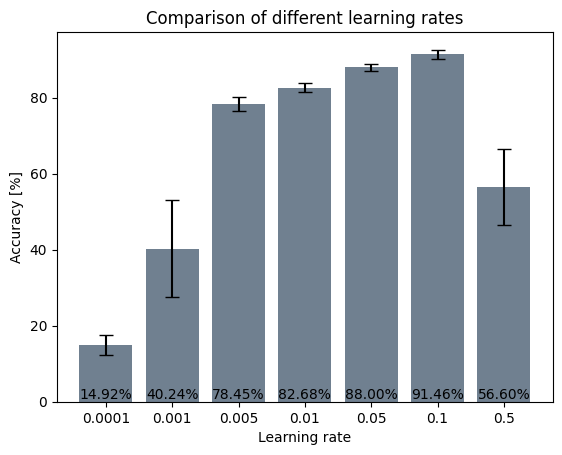

In [1]:
from report_utils import analyze_learning_rate, plt_accuracy, process_dataset
from activations import sigmoid, sigmoid_prime
from perceptron import Perceptron

X, Y = process_dataset()

p = Perceptron(64, 10, 3, 10, sigmoid, sigmoid_prime)

learning_rates = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
acc_arr = analyze_learning_rate(X, Y, p, learning_rates, 500, 0.33)

plt_accuracy(learning_rates, acc_arr)

### Wnioski z eksperymentu:
